In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', None)
import math
import time
import datetime


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importing files

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv') # example of what a submission should look like

In [3]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [5]:
gender_submission.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


# Train data info

In [6]:
#info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
#more info
def dkv_values(train):
    for i in range(0, len(train.columns)):
        print('----------', train.columns[i], '---------')
        print (train.iloc[:,i].value_counts())
        print ('----------', train.columns[i], '---------- \n')
dkv_values(train)    

---------- PassengerId ---------
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64
---------- PassengerId ---------- 

---------- Survived ---------
0    549
1    342
Name: Survived, dtype: int64
---------- Survived ---------- 

---------- Pclass ---------
3    491
1    216
2    184
Name: Pclass, dtype: int64
---------- Pclass ---------- 

---------- Name ---------
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: 

In [9]:
# stats of data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Missing Values 

<Figure size 720x432 with 0 Axes>

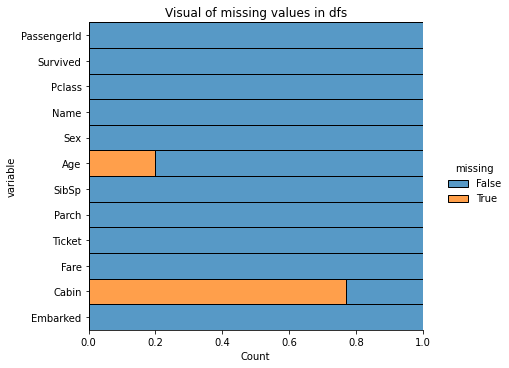

In [10]:
## Check frequency of missing values
plt.figure(figsize = (10,6))
sns.displot(
    data = train.isna().melt(value_name = 'missing'),
    y = 'variable',
    hue = 'missing',
    multiple = 'fill',
    aspect = 1.25)

plt.title('Visual of missing values in dfs')
#plt.savefig('Visual of missing values in train.png', dpi = 100)
plt.show()

In [11]:
#closer look
train.isnull().sum()/len(train)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [12]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
#unique
for item in train.columns:
    print(item,':',train[item].nunique())

PassengerId : 891
Survived : 2
Pclass : 3
Name : 891
Sex : 2
Age : 88
SibSp : 7
Parch : 7
Ticket : 681
Fare : 248
Cabin : 147
Embarked : 3


In [14]:
# see which columns are numerical and categorical
train.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

# Numerical and Categorical Columns Split

In [15]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [16]:
# looking at the values separately 
df_bin = pd.DataFrame() 
df_con = pd.DataFrame() 

# Numerical Columns Graphs

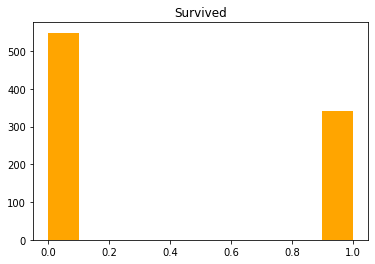

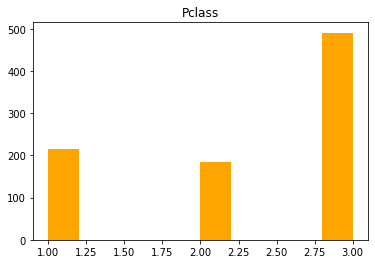

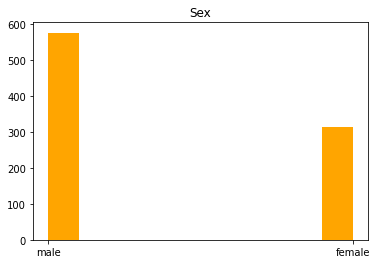

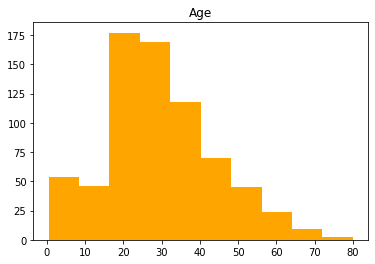

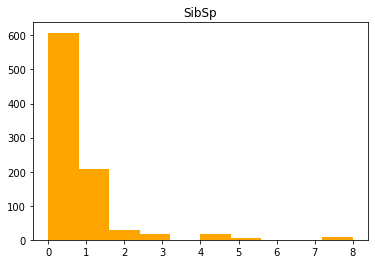

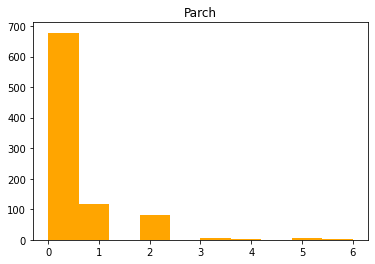

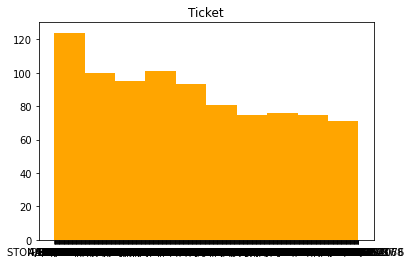

In [17]:
# plot distributions for all numerical columns 
for numerical_column in train[['Survived','Pclass','Sex','Age','SibSp','Parch','Ticket']]:
    plt.hist(train[numerical_column],color='orange')
    plt.title(numerical_column)
    #plt.savefig('numerical_column.png')
    plt.show()

# Heatmap

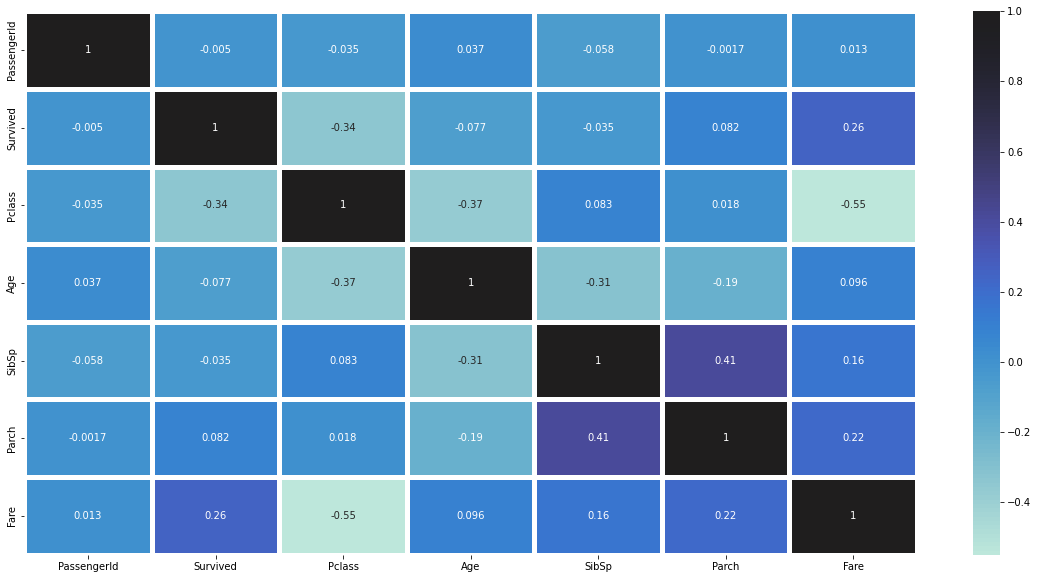

In [18]:
#heatmap of numerical columns
correlations_matrix = train.corr()
# Heatmap
plt.figure(figsize = (20,10))
sns.heatmap(correlations_matrix,linewidth=3.1,annot=True,center=1)
#plt.savefig('numerical_column_heatmap.png')
plt.show()

In [19]:
#let's compare the survival rates across the columns: Age, SibSp, Parch, and Fare 
pd.pivot_table(train, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


# Age

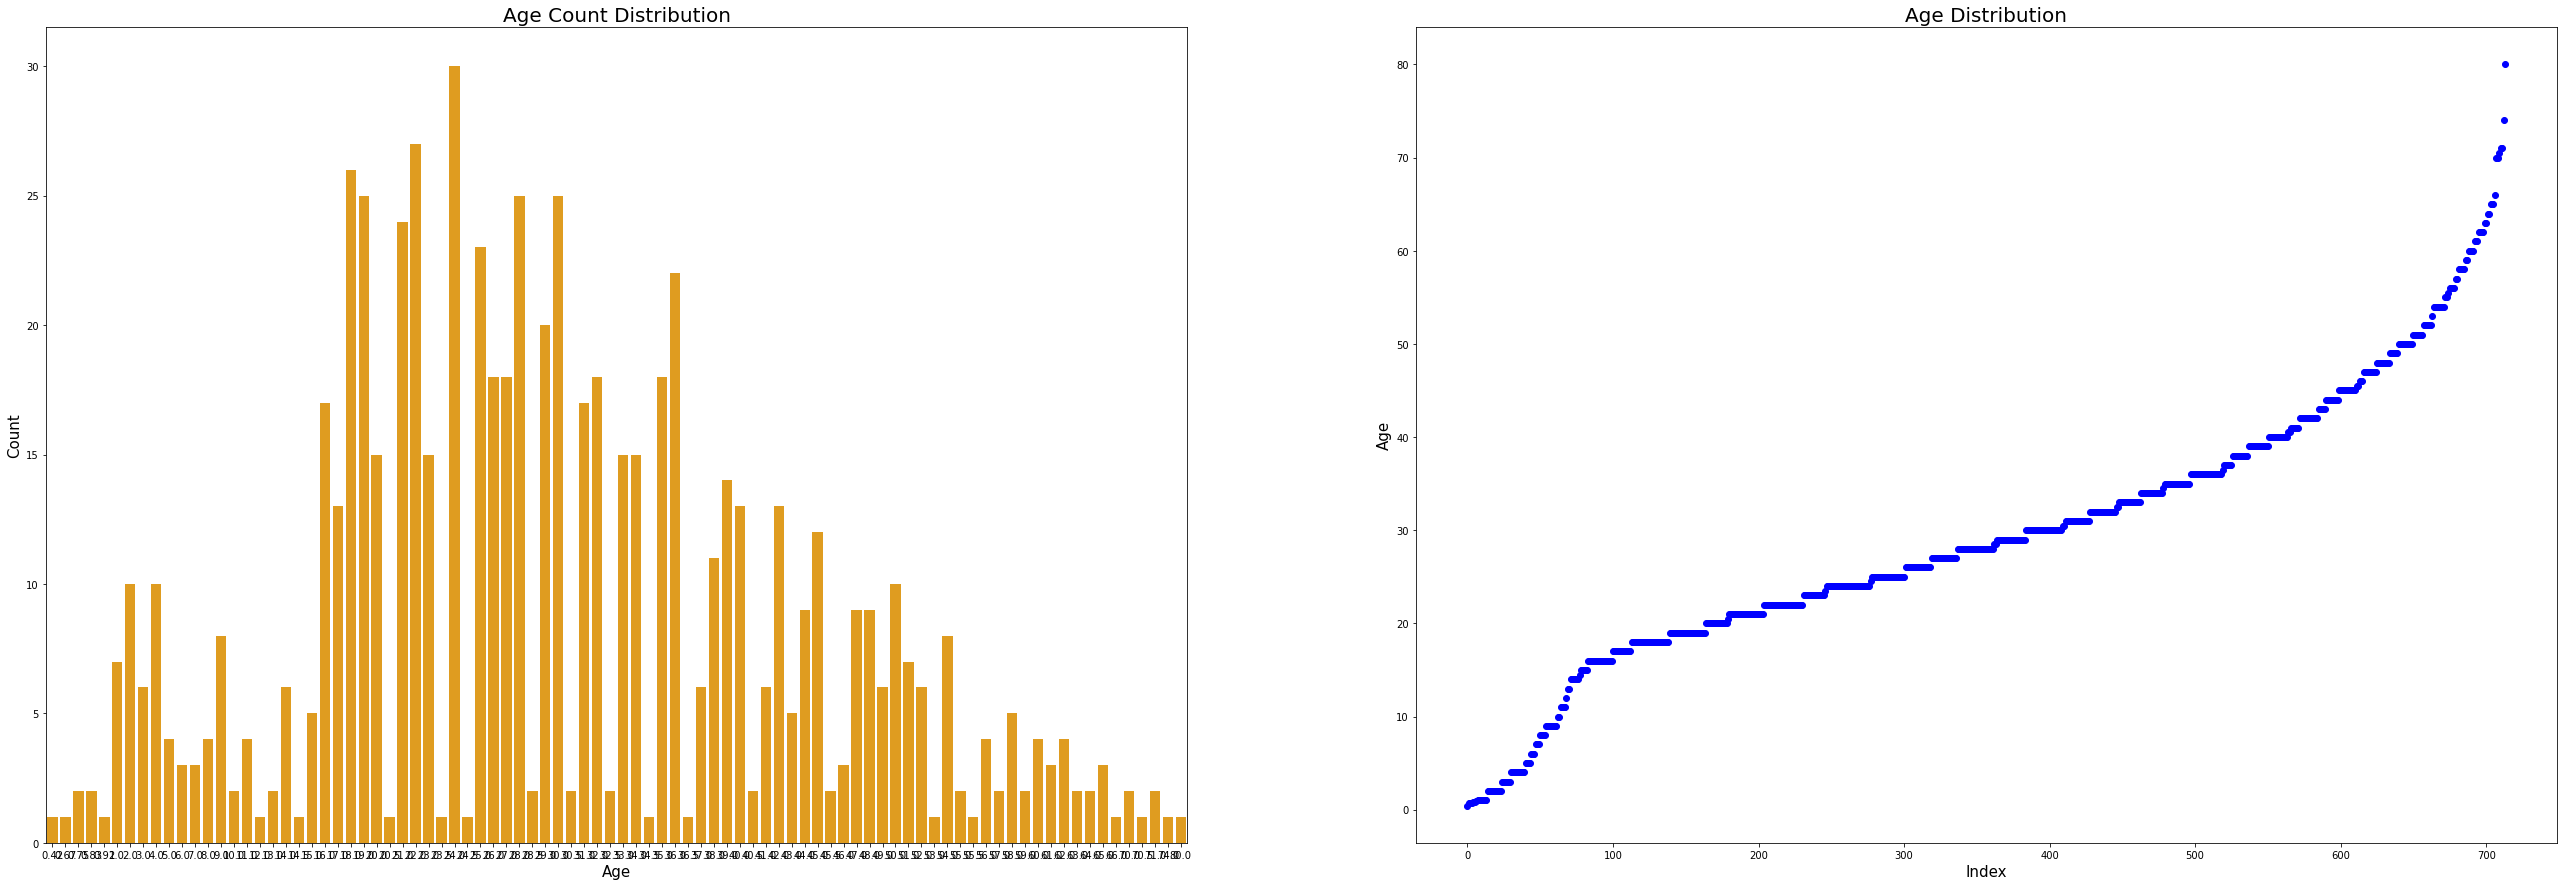

In [20]:
#plot Age countplot and scatterplot
plt.figure(figsize=(45,15))
plt.subplot(1,2,1) 
g = sns.countplot(x='Age', data=train, color='orange')     
g.set_title("Age Count Distribution", fontsize=20)
g.set_xlabel("Age", fontsize=15) 
g.set_ylabel("Count", fontsize=15) 
#plt.savefig('Age Count Distribution.png')

plt.subplot(1,2,2) 
plt.scatter(range(train.shape[0]), np.sort(train.Age.values), color='blue')
plt.xlabel('Index', fontsize=15)  
plt.ylabel('Age', fontsize=15)  
plt.title("Age Distribution", fontsize=20) 
#plt.savefig('Age Distribution.png')
plt.show() 

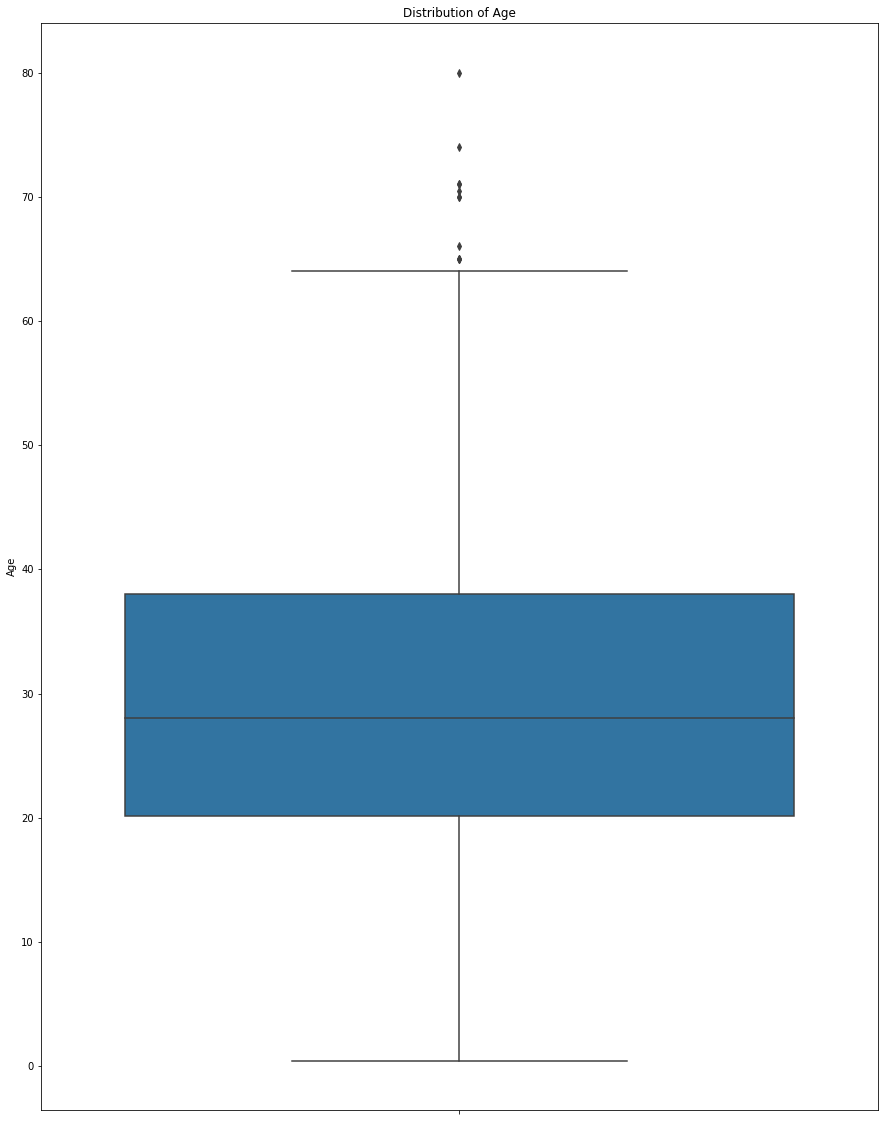

In [21]:
# plot distribution of Age
plt.figure(figsize = (15,20))
sns.boxplot(
    data = train,
    y = 'Age')
plt.title('Distribution of Age')
#plt.savefig('Distribution of Age.png')
plt.show()

In [22]:
# looks like Age column has outliers
# let's fill the outliers with the median Age
train['Age'] = train['Age'].fillna(train.Age.median())
#print resulting nan values
print(train.Age.isnull().sum())

0


# Pclass

In [23]:
# taking a look at Pclass
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

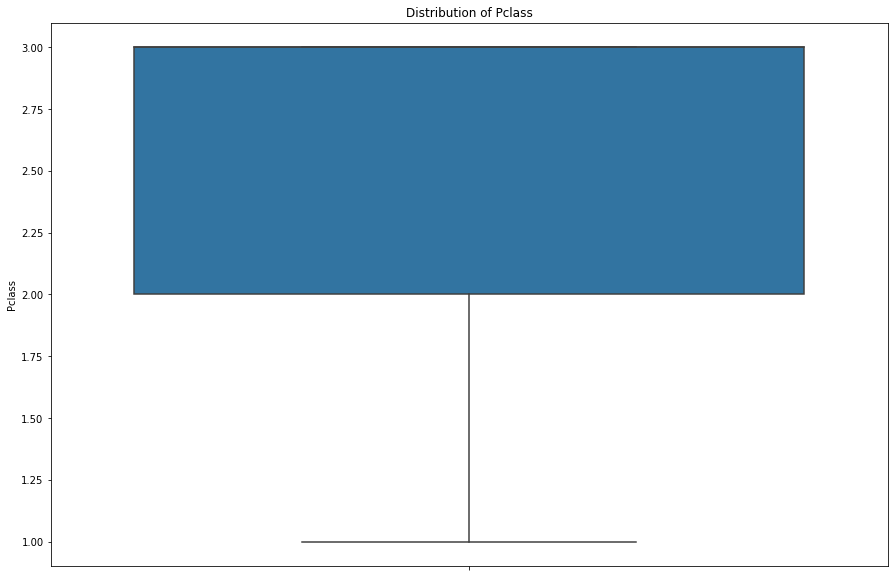

In [24]:
# plot distribution of Pclass
plt.figure(figsize = (15,10))
sns.boxplot(
    data = train,
    y = 'Pclass')
plt.title('Distribution of Pclass')
#plt.savefig('Distribution of Pclass.png')
plt.show()

C:\Users\eddie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Pclass Displot')

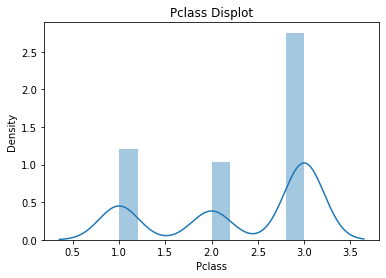

In [25]:
sns.distplot(train.Pclass)
plt.title('Pclass Displot')
#plt.savefig('Displot Pclass.png')

In [26]:
# add Pclass to the dataframes
df_bin['Pclass'] = train['Pclass']
df_con['Pclass'] = train['Pclass']

# Categorical Columns Graphs

C:\Users\eddie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


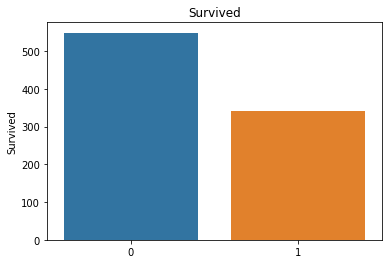

C:\Users\eddie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


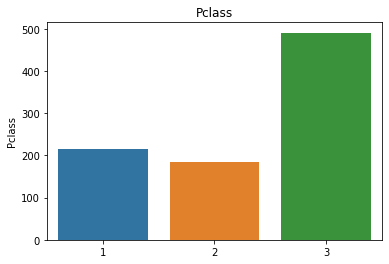

C:\Users\eddie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


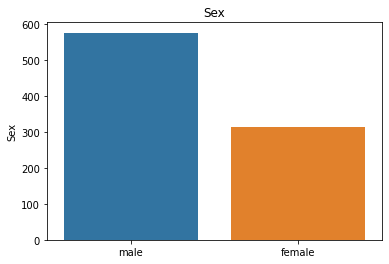

C:\Users\eddie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


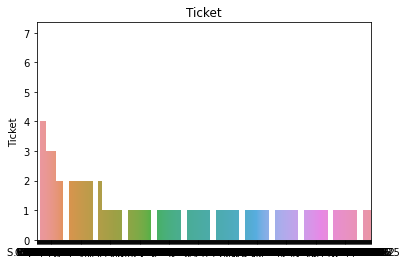

C:\Users\eddie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


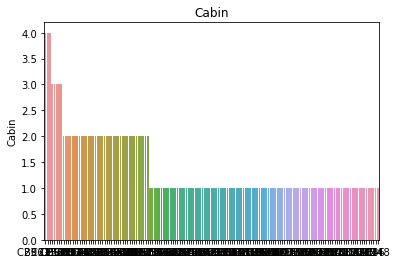

C:\Users\eddie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


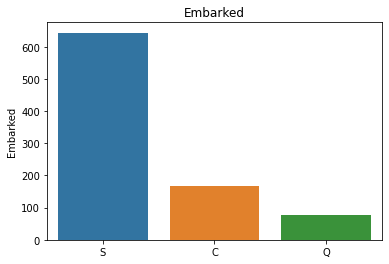

In [27]:
# let's look at the categorical columns
for categorical_column in train[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]:
    sns.barplot(train[categorical_column].value_counts().index,train[categorical_column].value_counts()).set_title(categorical_column)
    #plt.savefig('barplot_categorical_column.png')
    plt.show()

# Survival comparison

In [28]:
# the ticket and cabin graphs are  too messy
# first, let's compare survival for each cat column

print(pd.pivot_table(train, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print()
print()
print(pd.pivot_table(train, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()
print()
print(pd.pivot_table(train, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


Sex       female  male
Survived              
0             81   468
1            233   109


Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


# Parch

In [29]:
#missing values
train.Parch.isnull().sum()

0

In [30]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [31]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
# Add Parch to dataframes
df_bin['Parch'] = train['Parch']
df_con['Parch'] = train['Parch']

In [33]:
df_con.head()

,Pclass,Parch
0,3,0
1,1,0
2,3,0
3,1,0
4,3,0


# Cabin

In [34]:
# we need to look closer
# time for some feature engineering
train.Cabin
train['Cabin'] = train.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
#check
train['Cabin'].value_counts()


0    687
1    180
2     16
3      6
4      2
Name: Cabin, dtype: int64

In [35]:
# check survival
pd.pivot_table(train, index = 'Survived', columns = 'Cabin', values = 'Ticket' ,aggfunc ='count')

Cabin,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [36]:
train.Cabin.isnull().sum()

0

In [37]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


### We won't use cabin for now

# Sex

In [38]:
train.Sex.head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [39]:
# add Sex to the dataframes
df_bin['Sex'] = train['Sex']
df_bin['Sex'] = np.where(df_bin['Sex'] == 'female', 1, 0) # change sex to 0 for male and 1 for female

df_con['Sex'] = train['Sex']

In [41]:
# Let's add survived to the dataframes
df_bin['Survived'] = train['Survived']
df_con['Survived'] = train['Survived']

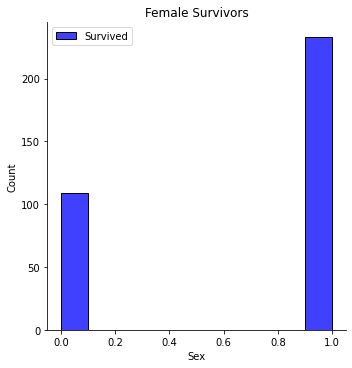

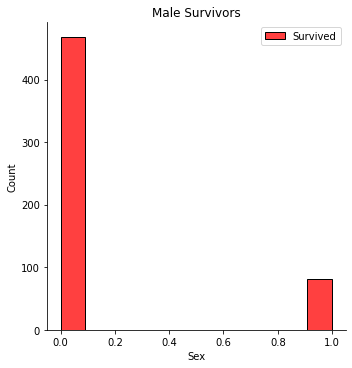

In [42]:
# How does the Sex variable look compared to Survival?
sns.displot(df_bin.loc[df_bin['Survived'] == 1]['Sex'], color ='blue');
plt.title('Female Survivors')
plt.legend(['Survived'])
sns.displot(df_bin.loc[df_bin['Survived'] == 0]['Sex'], color = 'red');
plt.title('Male Survivors')
plt.legend(['Survived'])
#plt.savefig('survives_sex.png')

In [43]:
df_con.head()

,Pclass,Parch,Sex,Survived
0,3,0,male,0
1,1,0,female,1
2,3,0,female,1
3,1,0,female,1
4,3,0,male,0


# Ticket values

In [ ]:
# How many unique kinds of Ticket are there?
print("There are {} unique Ticket values.".format(len(train.Ticket.unique())))

In [50]:
train.Ticket.isnull().sum()

0

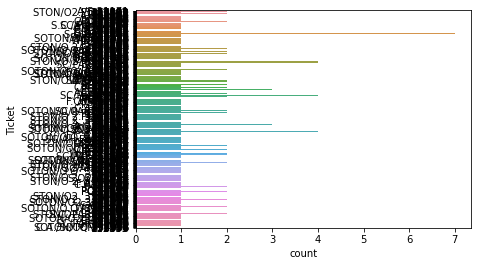

In [51]:
# plot
sns.countplot(y="Ticket", data=train);

In [52]:
# graph above is messy, let's take another look
train.Ticket.value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [54]:
len(train.Ticket.unique())

681

### We can't use ticket for now

# Name

In [48]:
train.Name.head(25)
#train['name_title'] = train.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [49]:
train['Name'].value_counts()

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

### We can't use name for now

# SibSp (siblings/spouses)

In [44]:
train.SibSp.value_counts()


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [45]:
# Add SibSp to dataframes
df_bin['SibSp'] = train['SibSp']
df_con['SibSp'] = train['SibSp']

In [46]:
df_con.head()

,Pclass,Parch,Sex,Survived,SibSp
0,3,0,male,0,1
1,1,0,female,1,1
2,3,0,female,1,0
3,1,0,female,1,1
4,3,0,male,0,0


In [47]:
df_bin.head()

,Pclass,Parch,Sex,Survived,SibSp
0,3,0,0,0,1
1,1,0,1,1,1
2,3,0,1,1,0
3,1,0,1,1,1
4,3,0,0,0,0


# Embarked

In [63]:
# C = Chervourg
# Q = Queenstown
# S = Southhampton
train.Embarked.head(25)

0     S
1     C
2     S
3     S
4     S
5     Q
6     S
7     S
8     S
9     C
10    S
11    S
12    S
13    S
14    S
15    S
16    Q
17    S
18    S
19    C
20    S
21    S
22    Q
23    S
24    S
Name: Embarked, dtype: object

In [64]:
# how many nan values
train.Embarked.isnull().sum()

2

In [65]:
# drop the nan values
train.dropna(subset=['Embarked'],inplace = True)
print(len(train))


889


In [66]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Text(0.5, 1.0, 'Embarked Countplot')

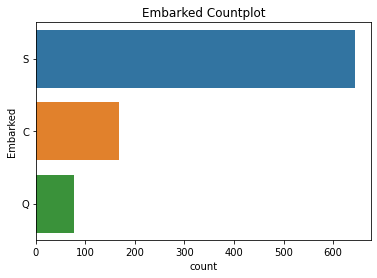

In [67]:
# plot
sns.countplot(y='Embarked', data=train);
plt.title('Embarked Countplot')
#plt.savefig('Embarked Countplot.png')

In [68]:
# Add Embarked to dataframes
df_bin['Embarked'] = train['Embarked']
df_con['Embarked'] = train['Embarked']

# Fare

In [69]:
train.Fare.head(25)

0      7.2500
1     71.2833
2      7.9250
3     53.1000
4      8.0500
5      8.4583
6     51.8625
7     21.0750
8     11.1333
9     30.0708
10    16.7000
11    26.5500
12     8.0500
13    31.2750
14     7.8542
15    16.0000
16    29.1250
17    13.0000
18    18.0000
19     7.2250
20    26.0000
21    13.0000
22     8.0292
23    35.5000
24    21.0750
Name: Fare, dtype: float64

In [70]:
# clean up fare column
train.Fare = train.Fare.fillna(train.Fare.median())

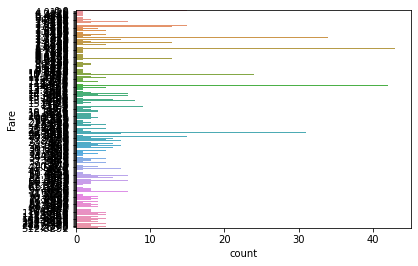

In [71]:
# plot
sns.countplot(y="Fare", data=train);

In [72]:
# unique
len(train.Fare.unique())

247

In [73]:
train.Fare.dtype

dtype('float64')

In [61]:
# Add Fare to dataframes
df_con['Fare'] = train['Fare'] 
df_bin['Fare'] = pd.cut(train['Fare'], bins=5) 

In [74]:
# fare bins 
df_bin.Fare.value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

# Let's put it all together with feature encoding

In [75]:
df_bin.head()

,Pclass,Parch,Sex,Survived,SibSp,Fare,Embarked
0,3,0,0,0,1,"(-0.512, 102.466]",S
1,1,0,1,1,1,"(-0.512, 102.466]",C
2,3,0,1,1,0,"(-0.512, 102.466]",S
3,1,0,1,1,1,"(-0.512, 102.466]",S
4,3,0,0,0,0,"(-0.512, 102.466]",S


In [76]:
df_bin.isnull().sum()

Pclass      0
Parch       0
Sex         0
Survived    0
SibSp       0
Fare        0
Embarked    2
dtype: int64

In [77]:
df_bin = df_bin.dropna(subset=['Embarked'])

In [78]:
df_bin.isnull().sum()

Pclass      0
Parch       0
Sex         0
Survived    0
SibSp       0
Fare        0
Embarked    0
dtype: int64

In [79]:
# one-hot encode
one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove('Survived')
df_bin_enc = pd.get_dummies(df_bin, columns=one_hot_cols)
df_bin_enc.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [80]:
df_con.head(10)

,Pclass,Parch,Sex,Survived,SibSp,Fare,Embarked
0,3,0,male,0,1,7.2500,S
1,1,0,female,1,1,71.2833,C
2,3,0,female,1,0,7.9250,S
3,1,0,female,1,1,53.1000,S
4,3,0,male,0,0,8.0500,S
5,3,0,male,0,0,8.4583,Q
6,1,0,male,0,0,51.8625,S
7,3,1,male,0,3,21.0750,S
8,3,2,female,1,0,11.1333,S
9,2,0,female,1,1,30.0708,C


In [81]:
# one hot encoding the categorical columns
df_embarked_one_hot = pd.get_dummies(df_con['Embarked'], prefix='embarked')

df_sex_one_hot = pd.get_dummies(df_con['Sex'], prefix='sex')

df_plcass_one_hot = pd.get_dummies(df_con['Pclass'], prefix='pclass')

In [82]:
# combine one hot encoded with df_con_enc
df_con_enc = pd.concat([df_con, df_embarked_one_hot, df_sex_one_hot, df_plcass_one_hot], axis=1)

# Drop the original cat columns
df_con_enc = df_con_enc.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [83]:
# let's look at df_con_enc
df_con_enc.head(25)

,Parch,Survived,SibSp,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,0,1,7.2500,0,0,1,0,1,0,0,1
1,0,1,1,71.2833,1,0,0,1,0,1,0,0
2,0,1,0,7.9250,0,0,1,1,0,0,0,1
3,0,1,1,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
20,0,0,0,26.0000,0,0,1,0,1,0,1,0
21,0,1,0,13.0000,0,0,1,0,1,0,1,0
22,0,1,0,8.0292,0,1,0,1,0,0,0,1
23,0,1,0,35.5000,0,0,1,0,1,1,0,0


# Build models

In [84]:
# seclect the dataframe to use for predictions
selected_df = df_con_enc

In [85]:
selected_df.head()

,Parch,Survived,SibSp,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,0,1,7.2500,0,0,1,0,1,0,0,1
1,0,1,1,71.2833,1,0,0,1,0,1,0,0
2,0,1,0,7.9250,0,0,1,1,0,0,0,1
3,0,1,1,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1


In [86]:
# split the dataframe
X_train = selected_df.drop('Survived', axis=1) # data
y_train = selected_df.Survived # labels

In [87]:
# shape of the data (without labels)
X_train.shape

(891, 11)

In [88]:
X_train.head()

,Parch,SibSp,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,7.2500,0,0,1,0,1,0,0,1
1,0,1,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,0,1,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [89]:
# shape of labels
y_train.shape

(891,)

# Function to fit ML code

In [90]:
# Machine learning libraries
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv
import time, datetime

In [91]:
# Function that runs the code and returns accuracy
def fit_ml_algo(algo, X_train, y_train, cv):
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, X_train, y_train, cv=cv, n_jobs = -1)
    # Cross-validation accuracy 
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    return train_pred, acc, acc_cv

# Logistic Regression Model

In [92]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), X_train, y_train, 10)
log_time = (time.time() - start_time)
print("Accuracy Percent: %s" % acc_log)
print()
print("Accuracy Percent of CV 10-Fold: %s" % acc_cv_log)
print()
print("Running Time Total: %s" % datetime.timedelta(seconds=log_time))

Accuracy Percent: 80.02

Accuracy Percent of CV 10-Fold: 79.46

Running Time Total: 0:00:06.468087


# K-Nearest Neighbors Model

In [93]:
# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), X_train, y_train, 10)
knn_time = (time.time() - start_time)
print("Accuracy Percent: %s" % acc_knn)
print()
print("Accuracy Percent of CV 10-Fold: %s" % acc_cv_knn)
print()
print("Running Time Total: %s" % datetime.timedelta(seconds=knn_time))

Accuracy Percent: 83.73

Accuracy Percent of CV 10-Fold: 77.33

Running Time Total: 0:00:00.230003


# Native Bayes Model

In [94]:
# Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), X_train, y_train, 10)
gaussian_time = (time.time() - start_time)
print("Accuracy Percent: %s" % acc_gaussian)
print("Accuracy Percent of CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time Total: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy Percent: 78.56
Accuracy Percent of CV 10-Fold: 78.0
Running Time Total: 0:00:00.050061


# SVC Model

In [96]:
# SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(), X_train, y_train, 30)
linear_svc_time = (time.time() - start_time)
print("Accuracy Percent: %s" % acc_linear_svc)
print("Accuracy Percent of CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time Total: %s" % datetime.timedelta(seconds=linear_svc_time))

C:\Users\eddie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy Percent: 78.9
Accuracy Percent of CV 10-Fold: 77.22
Running Time Total: 0:00:00.447166


# Decision Tree Model

In [97]:
# Decision Tree 
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), X_train, y_train,10)
dt_time = (time.time() - start_time)
print("Accuracy Percent: %s" % acc_dt)
print("Accuracy Percent of CV 10-Fold: %s" % acc_cv_dt)
print("Running Time Total: %s" % datetime.timedelta(seconds=dt_time))

Accuracy Percent: 92.48
Accuracy Percent of CV 10-Fold: 80.02
Running Time Total: 0:00:00.115999


# Gradient Boost Trees

In [98]:
# Gradient Boost Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), X_train, y_train, 10)
gbt_time = (time.time() - start_time)
print("Accuracy Percent: %s" % acc_gbt)
print("Accuracy Percent of CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time Total: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy Percent: 86.53
Accuracy Percent of CV 10-Fold: 81.14
Running Time Total: 0:00:00.808999


# CatBoost Model

In [99]:
# data for the CatBoost model
X_train.head()

,Parch,SibSp,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,7.2500,0,0,1,0,1,0,0,1
1,0,1,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,0,1,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [100]:
# labels for the CatBoost model
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [101]:
# categorical features for the CatBoost model
cat_features = np.where(X_train.dtypes != np.float)[0]
cat_features

C:\Users\eddie\AppData\Local\Temp/ipykernel_13260/1951222948.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat_features = np.where(X_train.dtypes != np.float)[0]


array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [102]:
# CatBoost Pool() function to pool together the training and categorical labels
train_pool = Pool(X_train, y_train,cat_features)

In [103]:
# CatBoost model
catboost_model = CatBoostClassifier(iterations=1000,custom_loss=['Accuracy'],loss_function='Logloss')

# Fit CatBoost 
catboost_model.fit(train_pool,plot=True)

# accuracy
acc_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.009807
0:	learn: 0.6868103	total: 178ms	remaining: 2m 57s
1:	learn: 0.6806293	total: 199ms	remaining: 1m 39s
2:	learn: 0.6753557	total: 211ms	remaining: 1m 10s
3:	learn: 0.6692166	total: 236ms	remaining: 58.8s
4:	learn: 0.6630875	total: 259ms	remaining: 51.5s
5:	learn: 0.6597874	total: 267ms	remaining: 44.2s
6:	learn: 0.6550199	total: 284ms	remaining: 40.3s
7:	learn: 0.6503019	total: 299ms	remaining: 37.1s
8:	learn: 0.6449496	total: 319ms	remaining: 35.1s
9:	learn: 0.6396476	total: 339ms	remaining: 33.6s
10:	learn: 0.6352667	total: 354ms	remaining: 31.8s
11:	learn: 0.6324140	total: 363ms	remaining: 29.9s
12:	learn: 0.6294447	total: 374ms	remaining: 28.4s
13:	learn: 0.6267122	total: 381ms	remaining: 26.8s
14:	learn: 0.6240021	total: 391ms	remaining: 25.7s
15:	learn: 0.6213497	total: 402ms	remaining: 24.8s
16:	learn: 0.6169438	total: 423ms	remaining: 24.5s
17:	learn: 0.6131688	total: 449ms	remaining: 24.5s
18:	learn: 0.6094911	total: 483ms	remaining: 24.9s
19:	lear

# Nice! Now let's perform CatBoost cross-validation

In [104]:
# how long
start_time = time.time()

# params for cross-validation 
cv_params = catboost_model.get_params()

# cross-validation for 20-folds 
cv_data = cv(train_pool,
             cv_params,
             fold_count=20,
             plot=True)

# time
catboost_time = (time.time() - start_time)

# save into a dataframe (cv_data)
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/20]
0:	learn: 0.6740973	test: 0.6811120	best: 0.6811120 (0)	total: 16.5ms	remaining: 16.5s
1:	learn: 0.6557604	test: 0.6702926	best: 0.6702926 (1)	total: 40.5ms	remaining: 20.2s
2:	learn: 0.6402820	test: 0.6615644	best: 0.6615644 (2)	total: 69.2ms	remaining: 23s
3:	learn: 0.6246257	test: 0.6548330	best: 0.6548330 (3)	total: 104ms	remaining: 25.9s
4:	learn: 0.6096041	test: 0.6461053	best: 0.6461053 (4)	total: 128ms	remaining: 25.6s
5:	learn: 0.5967048	test: 0.6400430	best: 0.6400430 (5)	total: 156ms	remaining: 25.8s
6:	learn: 0.5863644	test: 0.6338408	best: 0.6338408 (6)	total: 173ms	remaining: 24.5s
7:	learn: 0.5740869	test: 0.6265517	best: 0.6265517 (7)	total: 198ms	remaining: 24.5s
8:	learn: 0.5679725	test: 0.6214057	best: 0.6214057 (8)	total: 210ms	remaining: 23.1s
9:	learn: 0.5575528	test: 0.6154853	best: 0.6154853 (9)	total: 240ms	remaining: 23.7s
10:	learn: 0.5519486	test: 0.6114098	best: 0.6114098 (10)	total: 251ms	remaining: 22.6s
11:	learn: 0.5444497	test: 

# Let's see the CatBoost Medel Scores

In [105]:
# Print out the CatBoost model metrics
print("CatBoost Metrics")
print()
print("Accuracy Percent: {}".format(acc_catboost))
print()
print("Accuracy Percent of cross-validation 10-Fold: {}".format(acc_cv_catboost))
print()
print("Running Time Total: {}".format(datetime.timedelta(seconds=catboost_time)))

CatBoost Metrics

Accuracy Percent: 83.39

Accuracy Percent of cross-validation 10-Fold: 81.25

Running Time Total: 0:17:36.386132


# Which model has the best accuracy?

## Regular Accuracy Scores

In [106]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes','Linear SVC','Decision Tree','Gradient Boosting Trees','CatBoost'],
    'Score': [acc_knn,acc_log,acc_gaussian,acc_linear_svc,acc_dt,acc_gbt,acc_catboost]})
print("Accuracy Scores")
print()
models.sort_values(by='Score', ascending=False)

Accuracy Scores



,Model,Score
4,Decision Tree,92.48
5,Gradient Boosting Trees,86.53
0,KNN,83.73
6,CatBoost,83.39
1,Logistic Regression,80.02
3,Linear SVC,78.90
2,Naive Bayes,78.56


## Cross Validation Accuracy Scores

In [107]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes','Linear SVC','Decision Tree','Gradient Boosting Trees','CatBoost'],
    'Score': [acc_cv_knn, acc_cv_log,acc_cv_gaussian,acc_cv_linear_svc,acc_cv_dt,acc_cv_gbt,acc_cv_catboost]})
print('Cross Validation Accuracy Scores')
print()
cv_models.sort_values(by='Score', ascending=False)

Cross Validation Accuracy Scores



,Model,Score
6,CatBoost,81.25
5,Gradient Boosting Trees,81.14
4,Decision Tree,80.02
1,Logistic Regression,79.46
2,Naive Bayes,78.00
0,KNN,77.33
3,Linear SVC,77.22


# Which Features were important?

In [108]:
# Feature Importance
def feature_importance(model, data):
    """
    Function to show which features are most important in the model.
    ::param_model:: Which model to use?
    ::param_data:: What data to use?
    """
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp
    #plt.savefig('feature_importance.png') 

,imp,col
4,0.982124,embarked_Q
3,1.192873,embarked_C
5,1.769404,embarked_S
9,2.009744,pclass_2
8,2.624689,pclass_1
...,...,...
1,10.927189,SibSp
0,12.271605,Parch
2,15.750121,Fare
6,17.535611,sex_female


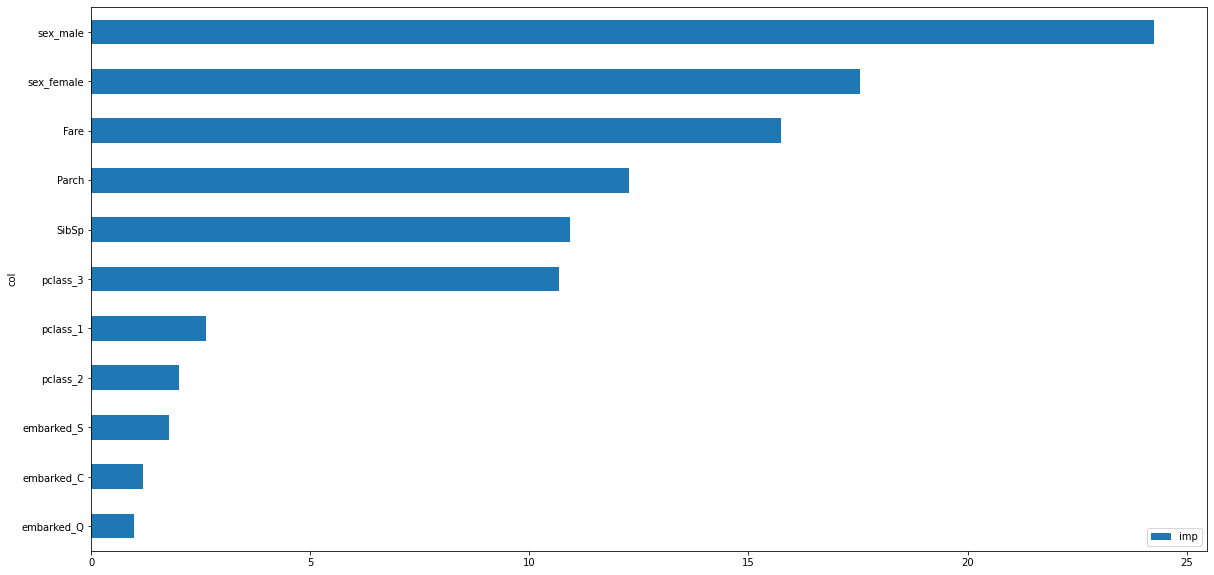

In [109]:
# Plot the feature importance scores
feature_importance(catboost_model, X_train)
#plt.savefig('feature_importance.png') 

# Precision and Recall

In [110]:
metrics = ['Precision', 'Recall', 'F1', 'AUC']

eval_metrics = catboost_model.eval_metrics(train_pool,
                                           metrics=metrics,
                                           plot=True)

for metric in metrics:
    print(str(metric)+": {}".format(np.mean(eval_metrics[metric])))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Precision: 0.842277323987376
Recall: 0.6709415204678362
F1: 0.7467995848963855
AUC: 0.886371147967064


# Submission

In [111]:
X_train.head()

,Parch,SibSp,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,7.2500,0,0,1,0,1,0,0,1
1,0,1,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,0,1,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [112]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [113]:
# One hot encode the columns in the test df
test_embarked_one_hot = pd.get_dummies(test['Embarked'], prefix='embarked')

test_sex_one_hot = pd.get_dummies(test['Sex'], prefix='sex')

test_plcass_one_hot = pd.get_dummies(test['Pclass'], prefix='pclass')

In [114]:
# combine test one hot encoded with test
test = pd.concat([test, test_embarked_one_hot, test_sex_one_hot, test_plcass_one_hot], axis=1)

In [115]:
test.head(25)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,912,1,"Rothschild, Mr. Martin",male,55.0,1,0,PC 17603,59.4000,NaN,C,1,0,0,0,1,1,0,0
21,913,3,"Olsen, Master. Artur Karl",male,9.0,0,1,C 17368,3.1708,NaN,S,0,0,1,0,1,0,0,1
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S,0,0,1,1,0,1,0,0
23,915,1,"Williams, Mr. Richard Norris II",male,21.0,0,1,PC 17597,61.3792,NaN,C,1,0,0,0,1,1,0,0


In [116]:
# columns used for the predictions
selected_test_columns = X_train.columns
selected_test_columns

Index(['Parch', 'SibSp', 'Fare', 'embarked_C', 'embarked_Q', 'embarked_S',
       'sex_female', 'sex_male', 'pclass_1', 'pclass_2', 'pclass_3'],
      dtype='object')

In [117]:
# prediction using the CatBoost model on the selected_test_columns
predictions = catboost_model.predict(test[selected_test_columns])

In [118]:
# predictions array is Survived 1 or Died 0
predictions[:20]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1],
      dtype=int64)

In [119]:
#submission dataframe
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions # model predictions 
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [129]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [121]:
#convert submission 'Survived' column to integer
submission['Survived'] = submission['Survived'].astype(int)

In [122]:
# submission dataframe
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [123]:
# check length
if len(submission) == len(test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (418 rows).


In [127]:
# convert submission dataframe to csv 
submission.to_csv('submission_file.csv', index=False)
print('Done!')

Done!


In [128]:
# Check the submission csv again
submissions_check = pd.read_csv("submission_file.csv")
submissions_check.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
